In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [2]:

!kaggle datasets download -d justin900429/3d-printer-defected-dataset

 81% 43.0M/52.8M [00:00<00:00, 118MB/s] 
100% 52.8M/52.8M [00:00<00:00, 109MB/s]


In [3]:
!unzip \*.zip

Archive:  3d-printer-defected-dataset.zip
  inflating: defected/bed_not_stick_0.jpg  
  inflating: defected/bed_not_stick_1.jpg  
  inflating: defected/bed_not_stick_10.jpg  
  inflating: defected/bed_not_stick_11.jpg  
  inflating: defected/bed_not_stick_12.jpg  
  inflating: defected/bed_not_stick_13.jpg  
  inflating: defected/bed_not_stick_14.jpg  
  inflating: defected/bed_not_stick_15.jpg  
  inflating: defected/bed_not_stick_16.jpg  
  inflating: defected/bed_not_stick_17.jpg  
  inflating: defected/bed_not_stick_18.jpg  
  inflating: defected/bed_not_stick_19.jpg  
  inflating: defected/bed_not_stick_2.jpg  
  inflating: defected/bed_not_stick_20.jpg  
  inflating: defected/bed_not_stick_21.jpg  
  inflating: defected/bed_not_stick_22.jpg  
  inflating: defected/bed_not_stick_23.jpg  
  inflating: defected/bed_not_stick_24.jpg  
  inflating: defected/bed_not_stick_25.jpg  
  inflating: defected/bed_not_stick_26.jpg  
  inflating: defected/bed_not_stick_27.jpg  
  inflating: def

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Set the path to the folders containing cat and dog images
defect_folder = '/content/defected'
no_defect_folder = '/content/no_defected'

In [9]:
# Function to load and preprocess the images
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize the image to 224x224 pixels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB format
        images.append(img)
        labels.append(label)
    return images, labels

In [10]:
# Load and preprocess cat images
defect_images, defect_labels = load_images(defect_folder, 0)

# Load and preprocess dog images
no_defect_images, no_defect_labels = load_images(no_defect_folder, 1)

In [12]:
# Combine the cat and dog images and labels
images = defect_images + no_defect_images
labels = defect_labels + no_defect_labels

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [27]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # preprocessing_function=lambda img: cv2.cvtColor(cv2.Canny(cv2.GaussianBlur(img.astype(np.uint8), (5, 5), 0), 100, 200), cv2.COLOR_GRAY2RGB)  # Apply Canny edge detection after Gaussian blur
)

In [28]:
datagen.fit(train_images)

In [29]:
# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with augmented images
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10)


Epoch 1/10
39/39 [==============================] - 15s 333ms/step - loss: 36.2593 - accuracy: 0.5767
Epoch 2/10
39/39 [==============================] - 13s 340ms/step - loss: 0.5617 - accuracy: 0.7004
Epoch 3/10
39/39 [==============================] - 13s 342ms/step - loss: 0.4958 - accuracy: 0.7598
Epoch 4/10
39/39 [==============================] - 13s 341ms/step - loss: 0.4796 - accuracy: 0.7502
Epoch 5/10
39/39 [==============================] - 13s 339ms/step - loss: 0.3948 - accuracy: 0.8153
Epoch 6/10
39/39 [==============================] - 13s 344ms/step - loss: 0.3425 - accuracy: 0.8434
Epoch 7/10
39/39 [==============================] - 14s 347ms/step - loss: 0.3216 - accuracy: 0.8410
Epoch 8/10
39/39 [==============================] - 13s 341ms/step - loss: 0.3052 - accuracy: 0.8643
Epoch 9/10
39/39 [==============================] - 13s 341ms/step - loss: 0.2881 - accuracy: 0.8675
Epoch 10/10
39/39 [==============================] - 13s 339ms/step - loss: 0.2641 - accur

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

In [31]:
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 17ms/step - loss: 0.2643 - accuracy: 0.8654
Test Loss: 0.2643165588378906
Test Accuracy: 0.8653846383094788


In [33]:
from sklearn.metrics import confusion_matrix
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).flatten()

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

10/10 [==============================] - 0s 18ms/step
Confusion Matrix:
[[160   0]
 [ 42 110]]


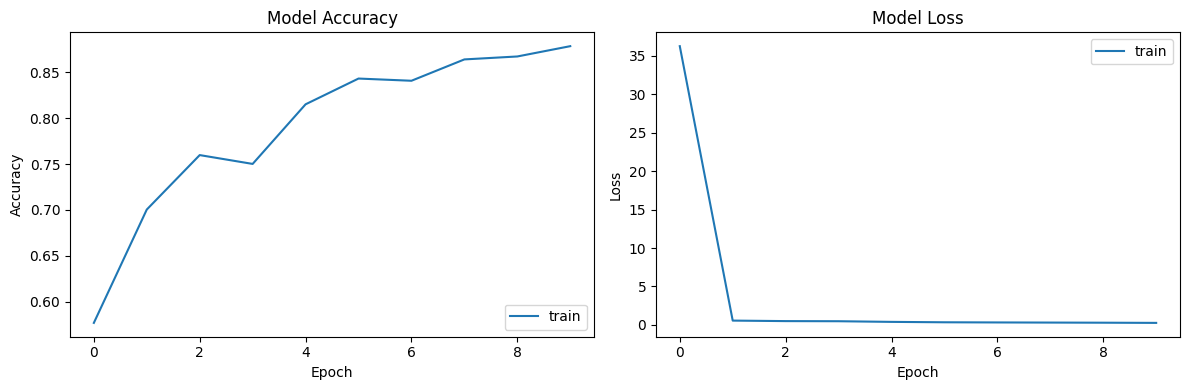

In [34]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()